In [1]:
import pandas as pd 
dataset = pd.read_csv("salary_data.csv")
dataset.tail(10) 

,SoNamKinhNghiem,Luong,NganhNghe
1416,4,14.9,Sale
1417,1,9.5,Sale
1418,8,22.9,Sale
1419,1,9.4,Sale
1420,9,25.0,Sale
1421,8,22.8,Sale
1422,6,18.7,Sale
1423,0,7.3,Sale
1424,0,7.2,Sale
1425,10,27.0,Sale


In [2]:
dataset.shape

(1426, 3)

In [3]:
dataset.describe()

,SoNamKinhNghiem,Luong
count,1426.000000,1426.000000
mean,4.894109,16.316550
std,3.075541,6.548031
min,0.000000,5.400000
25%,2.000000,10.900000
50%,5.000000,16.200000
75%,7.000000,21.300000
max,10.000000,70.000000


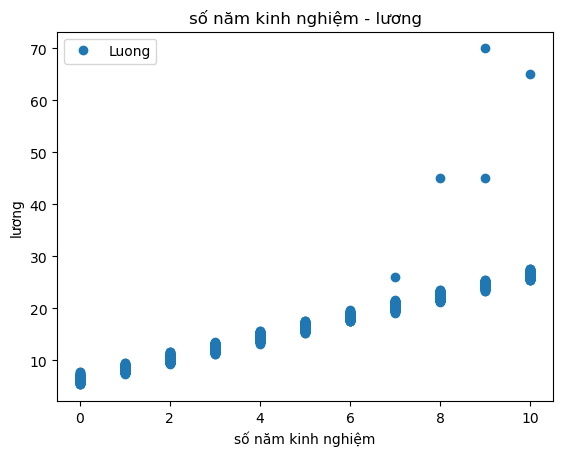

In [4]:
import matplotlib.pyplot as plt  # Khai báo thư viện để vẽ hình
dataset.plot(x='SoNamKinhNghiem', y='Luong', style='o')  
plt.title('số năm kinh nghiệm - lương')  
plt.xlabel('số năm kinh nghiệm')  
plt.ylabel('lương')  
plt.show()

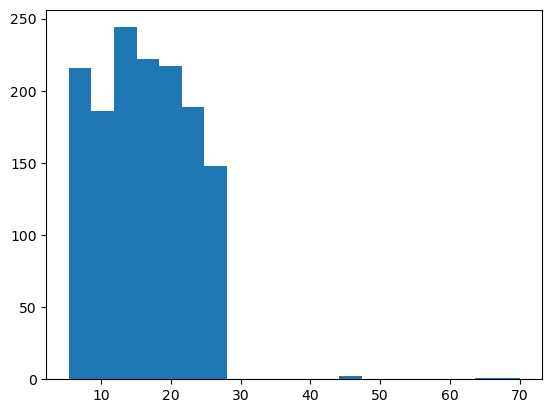

In [5]:
plt.hist(dataset['Luong'],20)
plt.show()

In [6]:
df_keToan = dataset[dataset["NganhNghe"] == "KeToan"]
df_hcnh = dataset[dataset["NganhNghe"] == "HCNS"]
df_sale = dataset[dataset["NganhNghe"] == "Sale"]

print ("Kết cấu bộ dữ liệu")
print ("Số lượng mẫu nhân viên kế toán: " + str(df_keToan.shape[0]))
print ("Số lượng mẫu nhân viên HCNH: " + str(df_hcnh.shape[0]))
print ("Số lượng mẫu nhân viên SALE: " + str(df_sale.shape[0]))

Kết cấu bộ dữ liệu
Số lượng mẫu nhân viên kế toán: 472
Số lượng mẫu nhân viên HCNH: 566
Số lượng mẫu nhân viên SALE: 388


In [7]:
n_by_nganhNghe = dataset.groupby("NganhNghe")["Luong"].mean()
n_by_nganhNghe

NganhNghe
HCNS      16.556537
KeToan    15.645975
Sale      16.782216
Name: Luong, dtype: float64

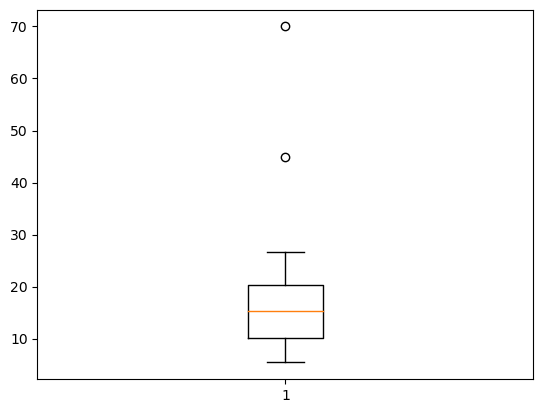

In [8]:
# Biểu đồ phân bố lương của nhân viên Kế toán
plt.boxplot(df_keToan['Luong'])
plt.show()

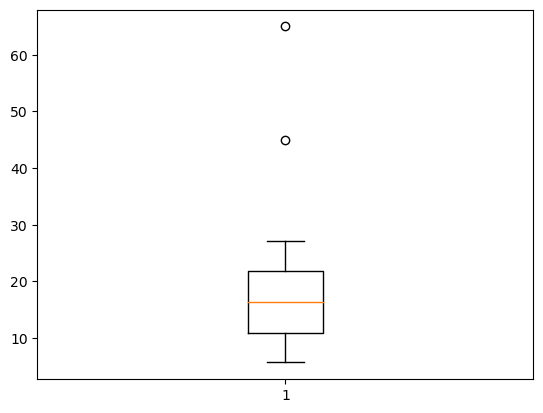

In [9]:
# Biểu đồ phân bố lương của nhân viên Kế toán
plt.boxplot(df_hcnh['Luong'])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X = dataset['SoNamKinhNghiem'].values.reshape(-1,1)
y = dataset['Luong'].values.reshape(-1,1)
# chia bộ dữ liệu làm 2 tập train và test theo tỉ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) #Huấn luyện mô hình
print( "Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm \nvới các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: Lương = a + b * số năm kinh nghiệm 
với các hệ số a và b lần lượt là
[6.35592115]
[[2.03289729]]


In [11]:
y_pred = regressor.predict(X_test) # dự đoán trên số năm kinh nghiệm của bộ dữ liệu test
## tính toán R2 của model
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_pred)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

df = pd.DataFrame({'số năm kinh nghiệm': X_test.flatten(), 'Lương Thực tế': y_test.flatten(), 'Lương Dự báo': y_pred.flatten()})
print("\n") # xuống dòng
print("Đánh giá năng lực dự báo trung bình trên tập test")
print('Sai số dự báo trung bình:', metrics.mean_absolute_error(y_test, y_pred))  

R2 trên tập huấn luyện của model là:0.9318331044271062
R2 trên tập kiểm tra của model là:0.8762196686203844


Đánh giá năng lực dự báo trung bình trên tập test
Sai số dự báo trung bình: 0.5566819767125354


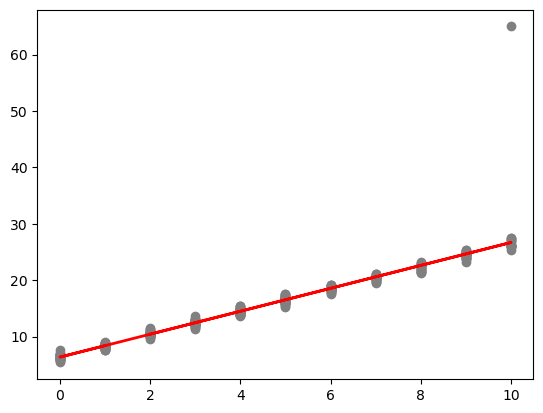

In [12]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
# lưu trữ mô hình vào máy tính
import pickle # thư viện  giúp lưu trữ mô hình
filename = 'model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [16]:
loaded_model = pickle.load(open(filename, 'rb'))
x = [[1],[2],[4]]
y_pred = loaded_model.predict(x)
y_pred

array([[ 8.38881844],
       [10.42171574],
       [14.48751032]])